In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%ls output_csvfile/output_ring

block_ring_128processors.csv  nonblock_ring_128processors.csv
block_ring_16processors.csv   nonblock_ring_16processors.csv
block_ring_256processors.csv  nonblock_ring_2processors.csv
block_ring_2processors.csv    nonblock_ring_32processors.csv
block_ring_32processors.csv   nonblock_ring_4processors.csv
block_ring_4processors.csv    nonblock_ring_64processors.csv
block_ring_64processors.csv   nonblock_ring_8processors.csv
block_ring_8processors.csv


In [12]:
dfs = []
for i in range(1, 4):
    dfs.append(pd.read_csv("output_csvfile/output_ring/block_ring_%dprocessors.csv" % 2 ** i))
    dfs[i - 1]["Processes"] = 2 ** i

In [ ]:
total_df = pd.concat(dfs)
#total_df

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

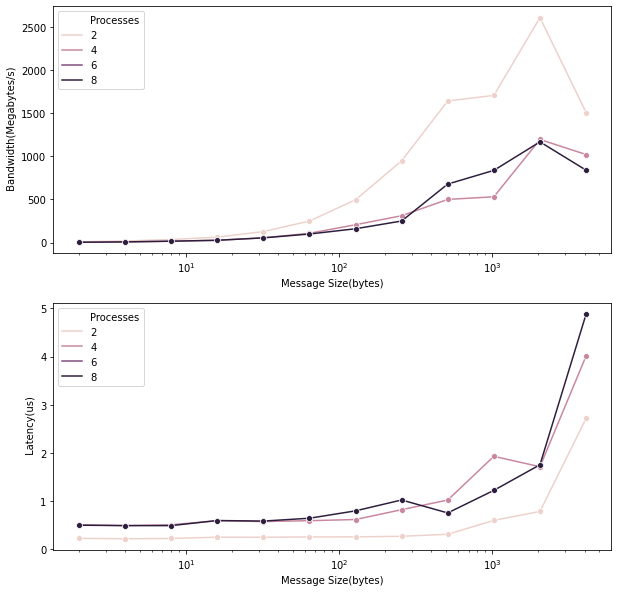

In [43]:
# Plot Block_ring
fig, ax = plt.subplots(2, 1,figsize=(10,10))
sns.lineplot(data=total_df, ax=ax[0], x="Message Size(bytes)", y=" Bandwidth(Megabytes/s)", hue="Processes", marker='o')
ax[0].set_xscale('log')

sns.lineplot(data=total_df, ax=ax[1], x="Message Size(bytes)", y=" Latency(us)", hue="Processes", marker='o')
ax[1].set_xscale('log')

plt.tight_layout